In [1]:
# import the numpy and the matplotlib libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Implement a CNN Model: 
• Load the CIFAR-10 dataset from Tensor Flow's datasets module. 
• Build a CNN model comprising of Convolutional, Pooling, Flaten, and Dense 
layers. 
• Compile and train the model using appropriate hyperparameters. 
• Save the model's architecture and weights for future comparisons.

In [68]:
# Loading the CIFAR-10 Dataset 
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [70]:
# Finding the size of the dataset
print('Training data:', train_images.shape, train_labels.shape)
print('Test data:', test_images.shape, test_labels.shape)

#Converting labels single dimensional
train_labels=np.ravel(train_labels)
print(train_labels.shape)

test_labels=np.ravel(test_labels)
print(test_labels.shape)

Training data: (50000, 32, 32, 3) (50000,)
Test data: (10000, 32, 32, 3) (10000,)
(50000,)
(10000,)


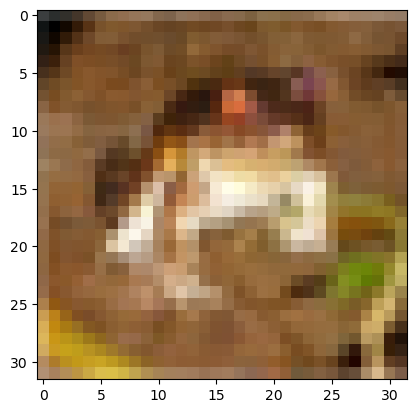

6 frog


In [71]:
#Assinging class names to the output labels 
class_names=['Airplane','Automobile','Bird','Cat','Deer','Dog','frog','Horse','Ship','Truck']

# Display image ‘0’
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.show()
print(train_labels[0], class_names[train_labels[0]])


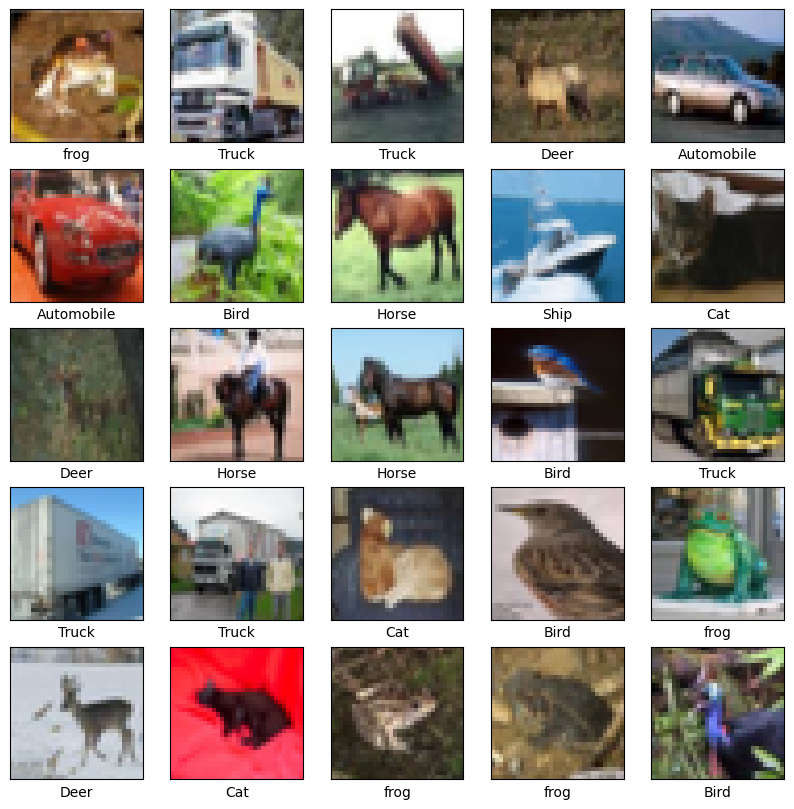

In [5]:
#Displaying first 25 images from dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [72]:
#Normalization of the data
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.min(), train_images.max())

0.0 1.0


In [73]:
#Implementing CNN Model

import tensorflow as tf
from tensorflow.keras import layers, models
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# define the  CNN model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [74]:
#Compiling the model and printing the summary of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 2304)              0         
                                                                 
 dense_19 (Dense)            (None, 128)              

In [75]:
#Training the model
history1 = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 61s 91ms/step - loss: 1.5106 - accuracy: 0.4540 - val_loss: 1.2456 - val_accuracy: 0.5684
Epoch 2/10
625/625 [==============================] - 42s 68ms/step - loss: 1.1495 - accuracy: 0.5959 - val_loss: 1.1055 - val_accuracy: 0.6127
Epoch 3/10
625/625 [==============================] - 41s 65ms/step - loss: 1.0098 - accuracy: 0.6471 - val_loss: 1.0921 - val_accuracy: 0.6154
Epoch 4/10
625/625 [==============================] - 41s 66ms/step - loss: 0.9211 - accuracy: 0.6772 - val_loss: 0.9966 - val_accuracy: 0.6533
Epoch 5/10
625/625 [==============================] - 41s 66ms/step - loss: 0.8525 - accuracy: 0.7011 - val_loss: 0.9586 - val_accuracy: 0.6711
Epoch 6/10
625/625 [==============================] - 39s 63ms/step - loss: 0.7888 - accuracy: 0.7244 - val_loss: 0.9316 - val_accuracy: 0.6841
Epoch 7/10
625/625 [==============================] - 42s 67ms/step - loss: 0.7238 - accuracy: 0.7484 - val_loss: 0.9066 - val_accuracy:

In [76]:
#Saving the CNN Model to a file
model.save('CNN_model1.h5')
#To load model:
from tensorflow.keras.models import load_model
CNN_model1 = load_model('CNN_model1.h5')

# 2. Evaluate CNN Model: 
• Evaluate the model's performance on the test data. 
• Plot visualizations for training and validation accuracy and loss over epochs.

In [77]:
# Model performance on the test data
test_loss, test_acc = CNN_model1.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 4s - loss: 0.9679 - accuracy: 0.6829 - 4s/epoch - 13ms/step

Test accuracy: 0.6829000115394592


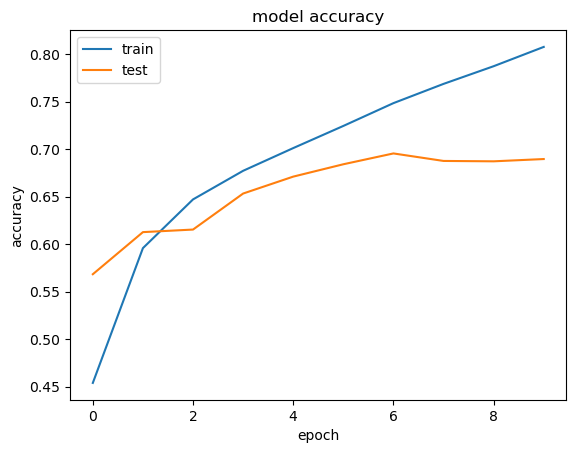

In [78]:
# Visualize Model Training History

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


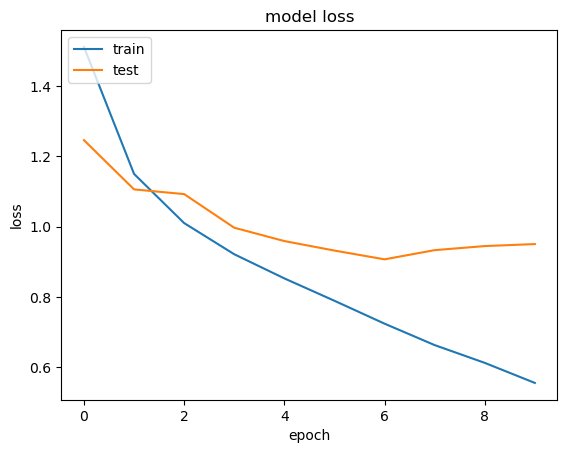

In [79]:
# summarize history for loss

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [80]:
#Getting the predictions on the test images from the model
predictions = CNN_model1.predict (test_images)
print(predictions.shape, test_labels.shape)



313/313 [==============================] - 4s 12ms/step
(10000, 10) (10000,)


In [81]:
#Display the Confusion Matrix:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test_labels, np.argmax(predictions, axis=1)))

#Displaying the classification report
print(classification_report(test_labels, np.argmax(predictions, axis=1)))


[[646  17  71  27  29  13  19  16  73  89]
 [ 22 726  12  12   3   9  20   2  21 173]
 [ 43   5 604  49  77 106  51  28  14  23]
 [ 10  10  85 439  56 248  70  30  16  36]
 [ 12   6 113  53 592  77  59  73   9   6]
 [  9   1  56 107  40 703  18  41   4  21]
 [  2   3  77  54  32  45 760   6   8  13]
 [  5   4  40  39  64  99   4 717   2  26]
 [ 55  30  19  22  10  17   7   2 757  81]
 [ 13  36  12   8   5  10   5  13  13 885]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      1000
           1       0.87      0.73      0.79      1000
           2       0.55      0.60      0.58      1000
           3       0.54      0.44      0.49      1000
           4       0.65      0.59      0.62      1000
           5       0.53      0.70      0.60      1000
           6       0.75      0.76      0.76      1000
           7       0.77      0.72      0.74      1000
           8       0.83      0.76      0.79      1000
           9       0.65     

# 3. Visualize Feature Maps: 
• Use intermediate layers of the trained model to visualize feature maps for some 
sample images from the test set.

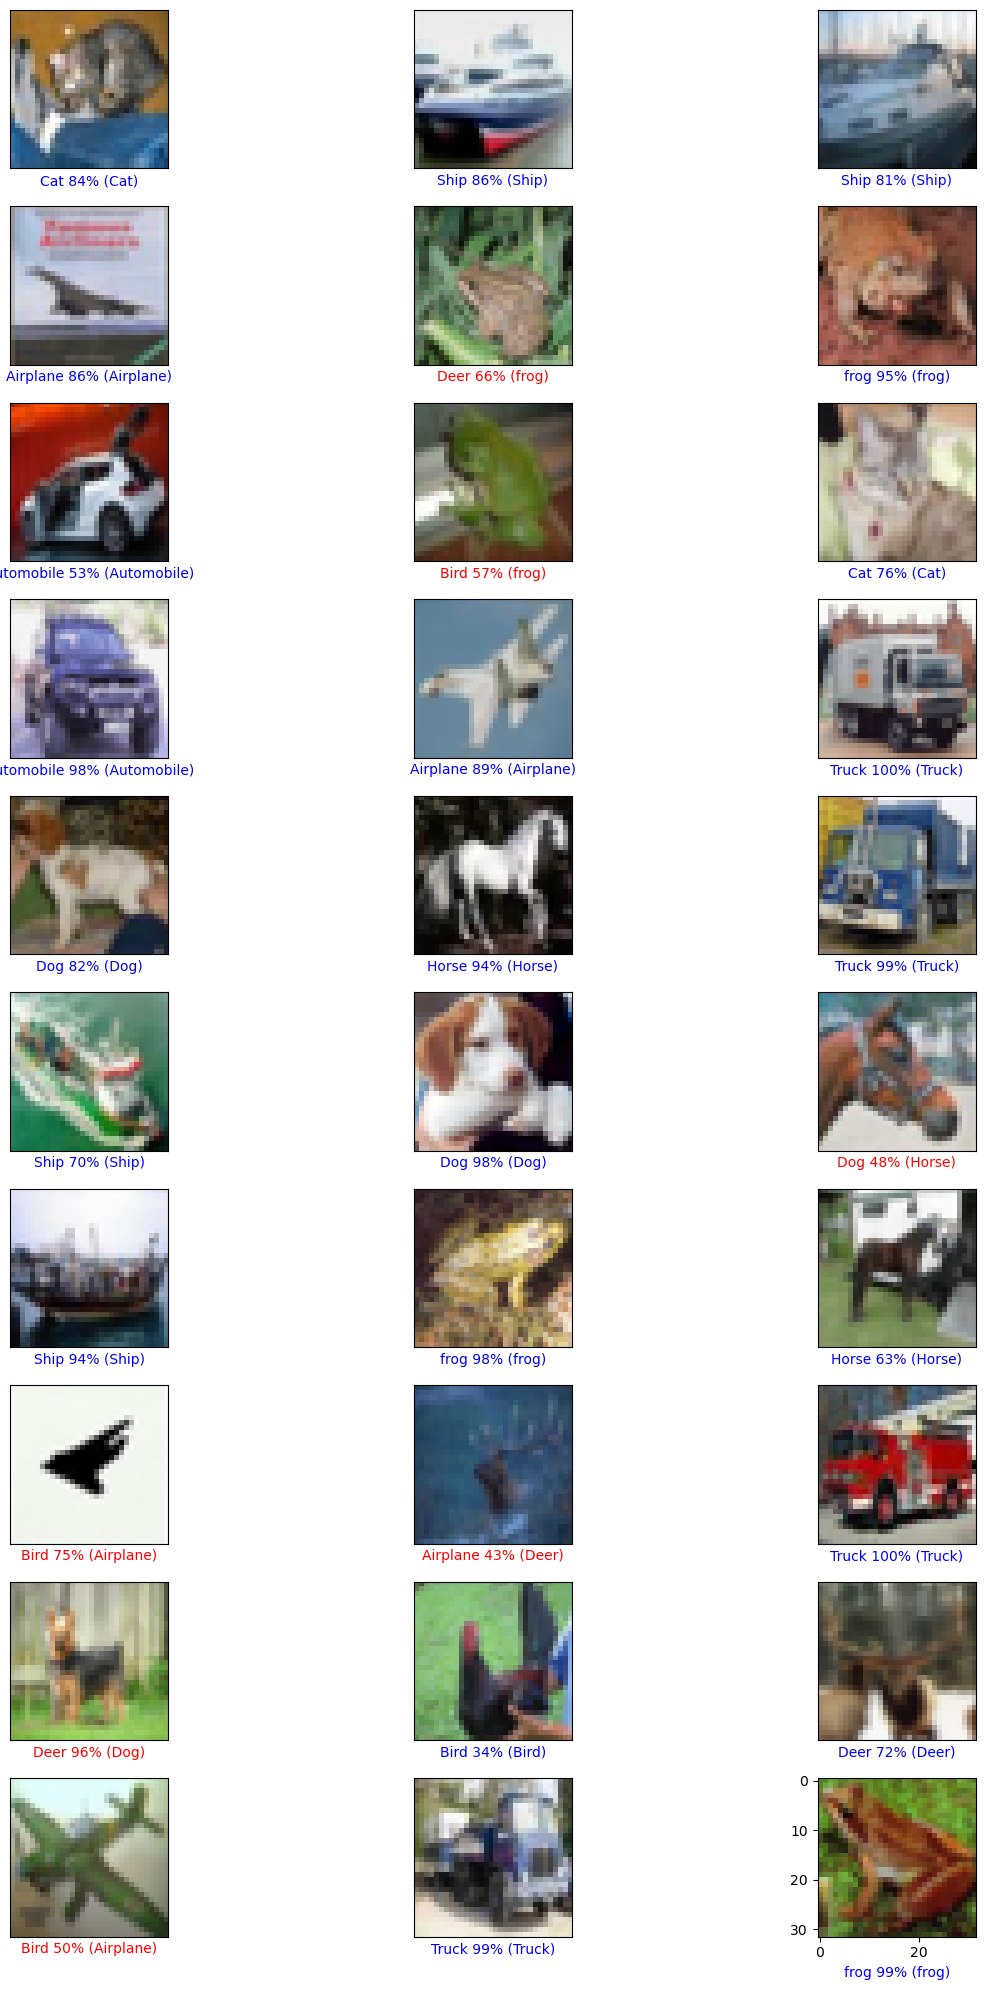

In [82]:
# Plot 15 test images, their predicted labels, and the true labels
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.grid(False)

predicted_labels = np.argmax(predictions, axis=1)

for i in range(num_images):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    color = 'blue' if predicted_labels[i] == test_labels[i] else 'red'
    
    plt.xlabel(f"{class_names[predicted_labels[i]]} {100*np.max(predictions[i]):2.0f}% ({class_names[test_labels[i]]})", color=color)

plt.tight_layout()
plt.show()


# 3 Visualization Feature Maps:

In [83]:

from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]

activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

Automobile_list = [i for i in range(len(train_images)) if train_labels[i] == 1]
print(len(Automobile_list))

print(Automobile_list[0:10])
train_labels[Automobile_list[0:10]]


5000
[4, 5, 32, 44, 45, 46, 60, 61, 64, 65]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

1/1 [==============================] - 0s 69ms/step


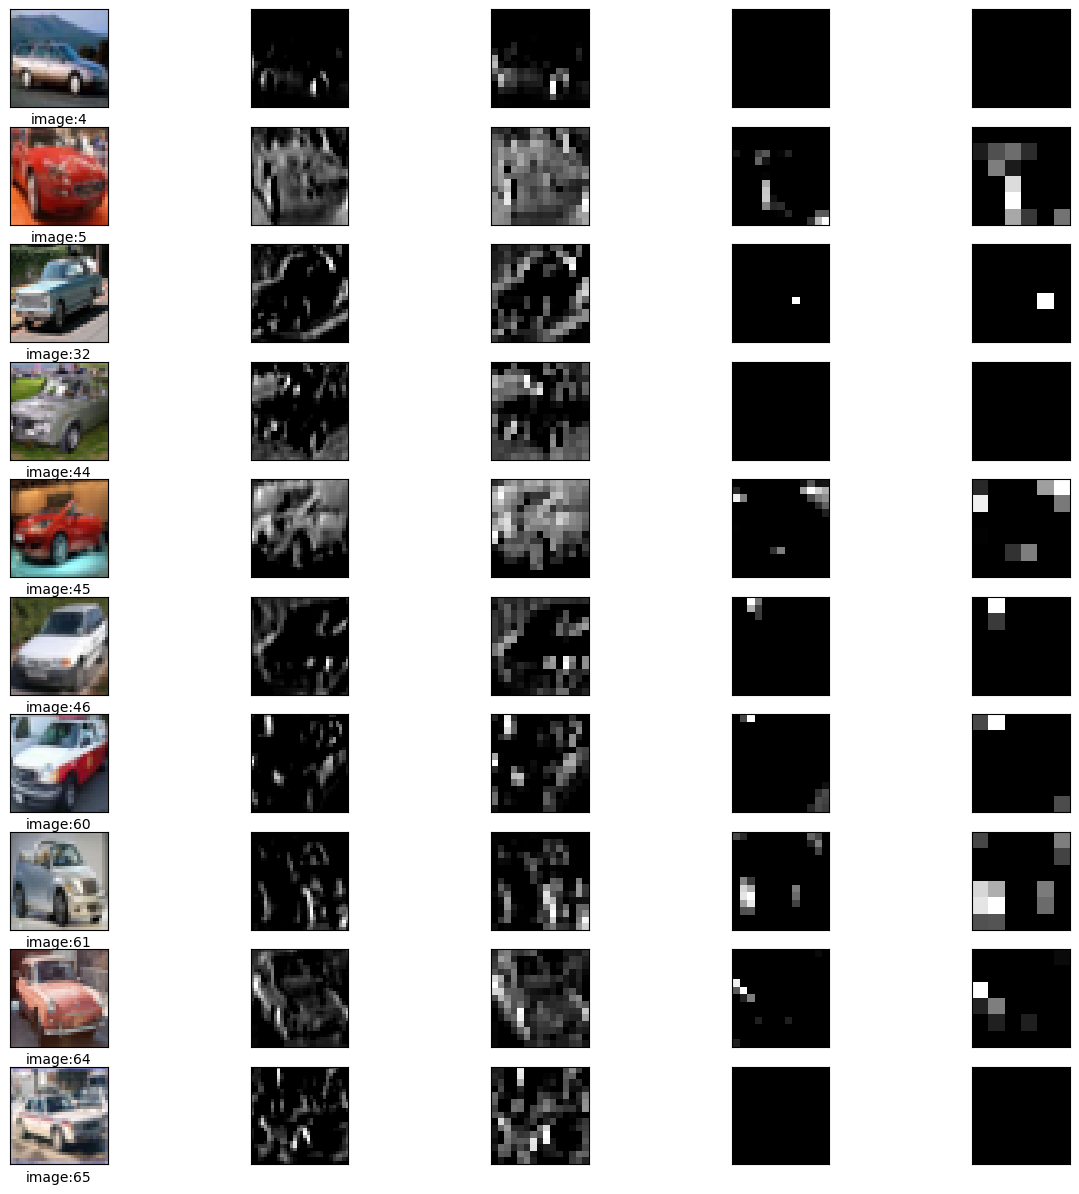

In [84]:
#Here we are seeing the Automobile image output after each layer i.e how the model see's the input image after each layer 

np.argmax(model.predict(train_images[Automobile_list[0:10]]), axis=1)

f, ax = plt.subplots(10,5)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax, xticks=[], yticks=[])

for idx, k in enumerate(Automobile_list[0:10]):
    ax[idx,0].imshow(train_images[k], cmap='gray')
    ax[idx,0].set_xlabel('image:'+str(k))
    for lay_ind in range(0,4):
        f = activation_model.predict(train_images[k].reshape(1, 32, 32, 3))[lay_ind]
        ax[idx,lay_ind+1].imshow(f[0, : , :, 1], cmap='gray')


# 4.Dense Layer Model: 


In [19]:
#Dense model 
# Import the Keras library
from tensorflow import keras

model = keras.Sequential([
    # Input Layer: Flatten the 2D array to 1D
    keras.layers.Flatten(input_shape=(32,32,3)), 
    # Hidden Layer: Dense layer with 128 neurons
    keras.layers.Dense(128, activation='relu'), 
    # Hidden Layer: Dense layer with 64 neurons
    keras.layers.Dense(64, activation='relu'), 
    # Output Layer: 10 neurons, each representing a class
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
##### Compile the Model
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               393344    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Train the Model
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
625/625 [==============================] - 4s 6ms/step - loss: 1.8976 - accuracy: 0.3178 - val_loss: 1.8077 - val_accuracy: 0.3491
Epoch 2/15
625/625 [==============================] - 3s 5ms/step - loss: 1.7234 - accuracy: 0.3841 - val_loss: 1.7062 - val_accuracy: 0.3887
Epoch 3/15
625/625 [==============================] - 3s 5ms/step - loss: 1.6478 - accuracy: 0.4147 - val_loss: 1.6334 - val_accuracy: 0.4228
Epoch 4/15
625/625 [==============================] - 3s 5ms/step - loss: 1.6061 - accuracy: 0.4262 - val_loss: 1.6300 - val_accuracy: 0.4217
Epoch 5/15
625/625 [==============================] - 3s 5ms/step - loss: 1.5669 - accuracy: 0.4421 - val_loss: 1.6145 - val_accuracy: 0.4262
Epoch 6/15
625/625 [==============================] - 3s 5ms/step - loss: 1.5292 - accuracy: 0.4559 - val_loss: 1.5936 - val_accuracy: 0.4361
Epoch 7/15
625/625 [==============================] - 4s 6ms/step - loss: 1.5183 - accuracy: 0.4595 - val_loss: 1.5741 - val_accuracy: 0.4381
Epoch 

In [22]:
#Saving the CNN Model to a file
model.save('DENSE_model.h5')
#To load model:
from tensorflow.keras.models import load_model
DENSE_model = load_model('DENSE_model.h5')

# 5. Evaluate the Dense Model: 
• Evaluate the model's performance on the test data. 
• Compare the Dense model's results with the CNN model's results. Discuss the 
advantages and limitations of each model. 


In [23]:
# Model performance on the test data
test_loss, test_acc = DENSE_model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.4701 - accuracy: 0.4760 - 1s/epoch - 4ms/step

Test accuracy: 0.47600001096725464


# 6. Modify the CNN Model: 
• Add an additional convolutional layer to the original CNN model, making any 
necessary changes. 
• Retrain the modified model and save its architecture and weights.

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# define the  CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #Modified number of filters in first layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #Added one more convolution layer with 64 filters
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
#Compiling the model and printing the summary of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 64)        

In [26]:
#Training the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2) 

Epoch 1/10
625/625 [==============================] - 24s 36ms/step - loss: 1.6346 - accuracy: 0.3965 - val_loss: 1.3354 - val_accuracy: 0.5171
Epoch 2/10
625/625 [==============================] - 23s 37ms/step - loss: 1.2524 - accuracy: 0.5530 - val_loss: 1.1572 - val_accuracy: 0.5945
Epoch 3/10
625/625 [==============================] - 16s 25ms/step - loss: 1.0982 - accuracy: 0.6151 - val_loss: 1.0608 - val_accuracy: 0.6230
Epoch 4/10
625/625 [==============================] - 18s 30ms/step - loss: 0.9982 - accuracy: 0.6515 - val_loss: 1.0577 - val_accuracy: 0.6330
Epoch 5/10
625/625 [==============================] - 19s 31ms/step - loss: 0.9273 - accuracy: 0.6746 - val_loss: 0.9772 - val_accuracy: 0.6569
Epoch 6/10
625/625 [==============================] - 18s 29ms/step - loss: 0.8682 - accuracy: 0.6962 - val_loss: 0.9725 - val_accuracy: 0.6639
Epoch 7/10
625/625 [==============================] - 20s 31ms/step - loss: 0.8126 - accuracy: 0.7165 - val_loss: 0.9011 - val_accuracy:

In [27]:
#Saving the CNN Model to a file
model.save('CNN_model2.h5')
#To load model:
from tensorflow.keras.models import load_model
CNN_model2 = load_model('CNN_model2.h5')

In [28]:
# Model performance on the test data
test_loss, test_acc = CNN_model2.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.9208 - accuracy: 0.6885 - 2s/epoch - 6ms/step

Test accuracy: 0.6884999871253967


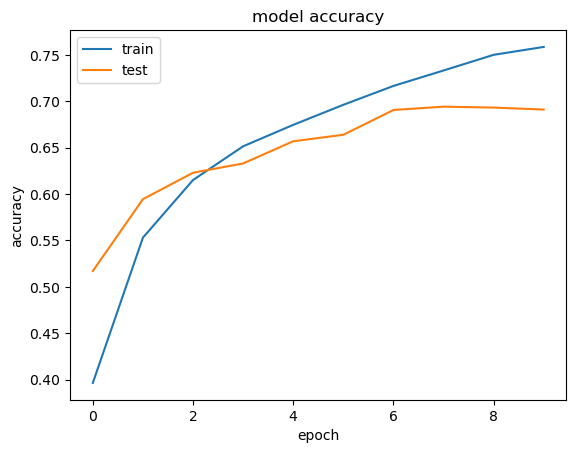

In [29]:
# Visualize Model Training History

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#The deviation between the train and the test accuracy shows that the model has started overfitting

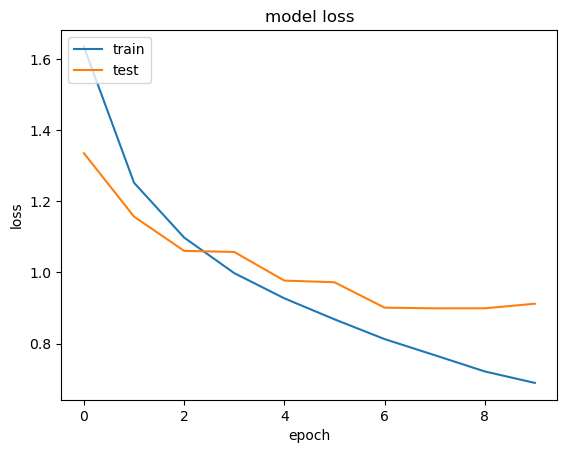

In [30]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
#Getting the predictions on the test images from the model
pred = CNN_model2.predict (test_images)
print(pred.shape, test_labels.shape)

313/313 [==============================] - 2s 5ms/step
(10000, 10) (10000,)


In [32]:
#Display the Confusion Matrix:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test_labels, np.argmax(pred, axis=1)))

#Displaying the classification report
print(classification_report(test_labels, np.argmax(pred, axis=1)))

[[826   9  29   8  11   3   5  11  67  31]
 [ 51 740   8   3   3   5   8   2  61 119]
 [109   8 552  28  80  90  62  33  23  15]
 [ 48   8  75 349  82 233  76  55  47  27]
 [ 53   2  82  33 612  43  59  87  23   6]
 [ 33   4  74  70  55 656  21  51  24  12]
 [ 15   4  55  33  47  41 769   7  16  13]
 [ 39   3  23  16  73  66   7 748   7  18]
 [ 91  16   8   5   1   5   5   5 842  22]
 [ 67  47   7   7   2   7   8  15  49 791]]
              precision    recall  f1-score   support

           0       0.62      0.83      0.71      1000
           1       0.88      0.74      0.80      1000
           2       0.60      0.55      0.58      1000
           3       0.63      0.35      0.45      1000
           4       0.63      0.61      0.62      1000
           5       0.57      0.66      0.61      1000
           6       0.75      0.77      0.76      1000
           7       0.74      0.75      0.74      1000
           8       0.73      0.84      0.78      1000
           9       0.75     

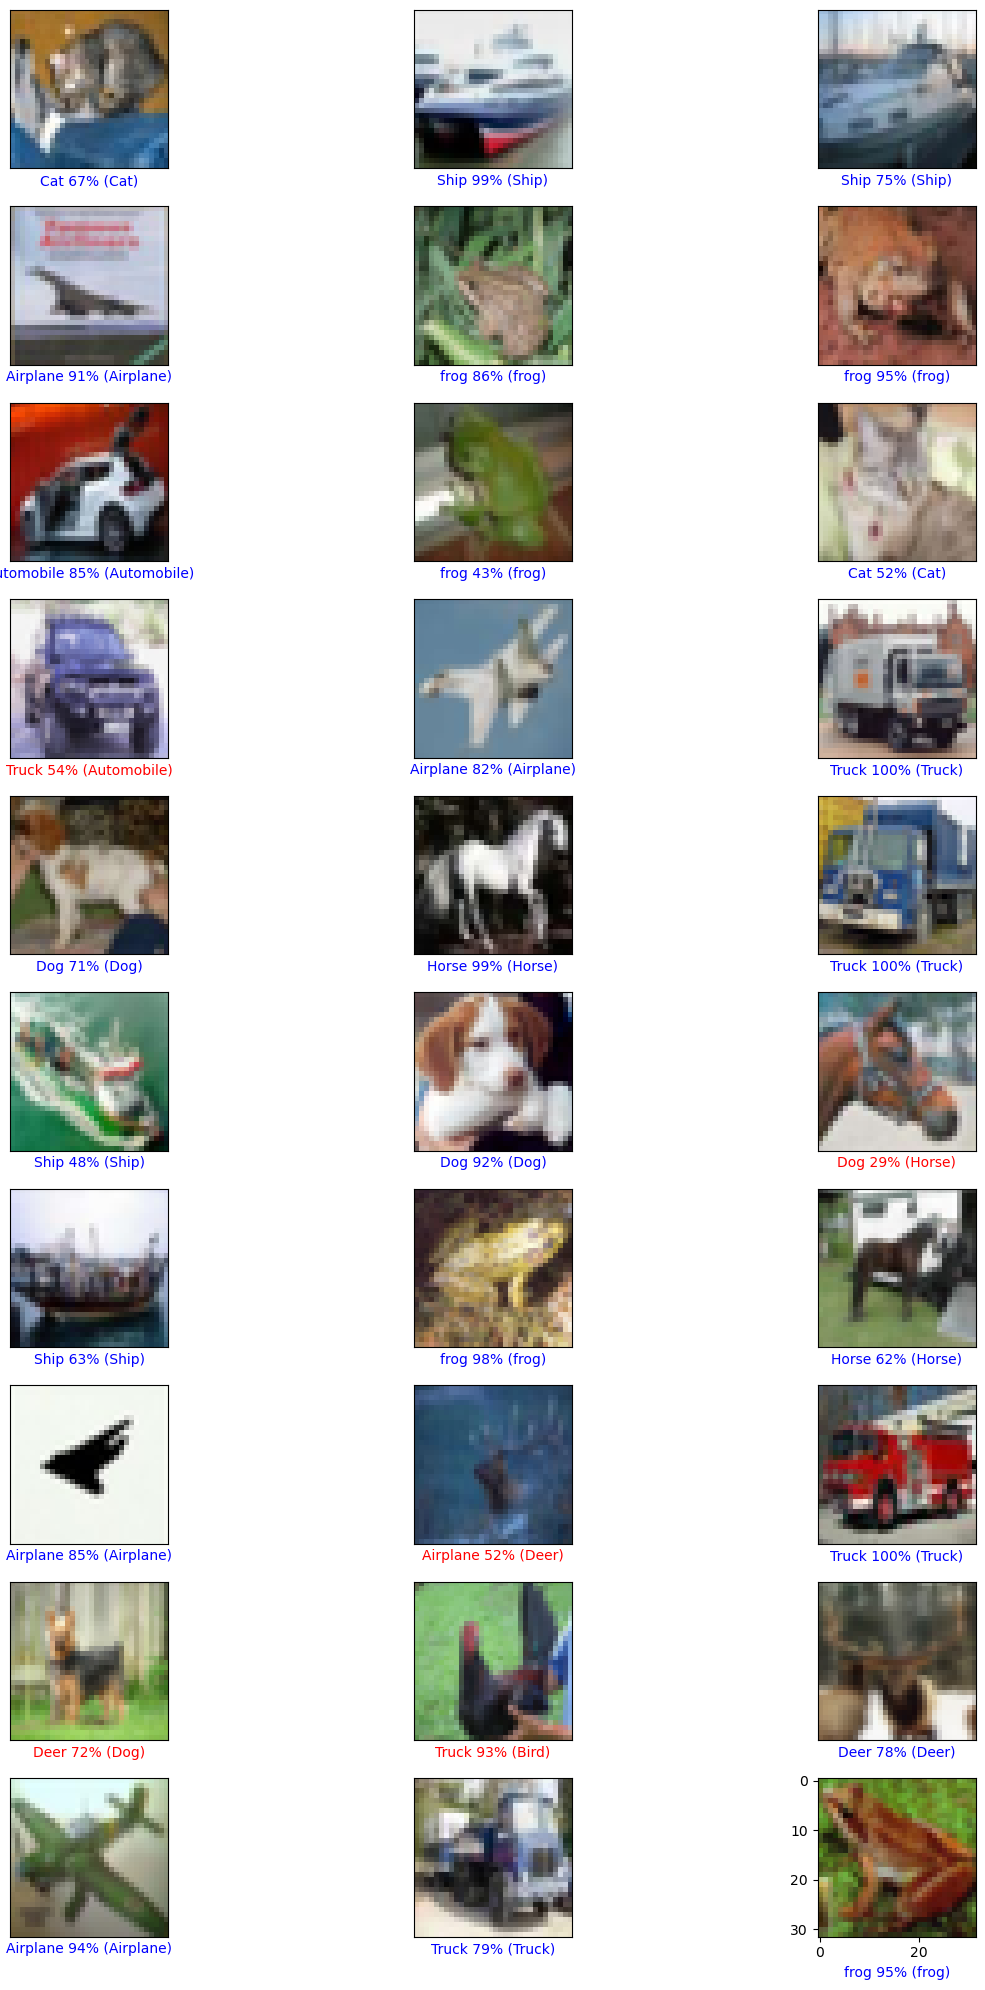

In [33]:
# Plot 15 test images, their predicted labels, and the true labels
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
plt.grid(False)

predicted_labels = np.argmax(pred, axis=1)

for i in range(num_images):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    color = 'blue' if predicted_labels[i] == test_labels[i] else 'red'
    
    plt.xlabel(f"{class_names[predicted_labels[i]]} {100*np.max(pred[i]):2.0f}% ({class_names[test_labels[i]]})", color=color)

plt.tight_layout()
plt.show()
